In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

repo_dir = os.getcwd() + '/repo'
tft_dir = os.path.join(repo_dir, 'tft')
os.chdir(tft_dir)


import warnings  
warnings.filterwarnings('ignore')

In [2]:
!ls

DLR_Subjects_Age_Height_Gender.xls  libs
DLR_dataset			    outputs_dlr
DLR_dataset.zip			    outputs_mobiact
MobiAct_Dataset_v2.0		    outputs_mobiact(v2)
MobiAct_Dataset_v2.0.rar	    outputs_mobiact_wo_age
NotchDataset			    outputs_mobiact_wo_height
Notch_Dataset.zip		    outputs_mobiact_wo_weight
SmartFall_Dataset		    outputs_notchFall
SmartFall_Dataset.zip		    outputs_notchFall_wo_known
data_formatters			    outputs_smartFall
dlr_preprocessed		    outputs_smartFall_3multihead
expt_settings			    outputs_smartFall_wo_known


In [3]:
output_folder = os.path.join(os.getcwd(), 'outputs_smartFall_wo_known')   # Root folder to save experiment outputs
force_download = False 
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [4]:
train = pd.read_csv('SmartFall_Dataset/SmartFall Training.csv')
train['per-id'] = 0
train['known'] = 0
train['time'] = list(range(len(train)))
train['circum'] = 0
train.outcome = train.outcome.astype(float)

test = pd.read_csv('SmartFall_Dataset/SmartFall Testing.csv')
test['per-id'] = 0
test['known'] = 0
test['time'] = list(range(len(test)))
test['circum'] = 0
test.outcome = test.outcome.astype(float)

In [4]:
train[397:450]

,ms_accelerometer_x,ms_accelerometer_y,ms_accelerometer_z,outcome,per-id,known,time,circum
397,0.725342,-0.205566,0.171631,0.0,0,0,397,0
398,0.725342,-0.205566,0.171631,1.0,0,0,398,0
399,0.726562,-0.042725,-0.007812,1.0,0,0,399,0
400,0.707031,-0.257324,-0.085693,1.0,0,0,400,0
401,0.655273,-0.413818,-0.272217,1.0,0,0,401,0
402,0.414551,-0.207031,-0.531006,1.0,0,0,402,0
403,0.180420,-0.692871,-0.453369,1.0,0,0,403,0
404,0.095215,-0.591553,-0.489990,1.0,0,0,404,0
405,-0.164062,-0.496338,-0.117920,1.0,0,0,405,0
406,-0.112061,0.338623,-0.210449,1.0,0,0,406,0


In [10]:
train.columns

Index([' ms_accelerometer_x', ' ms_accelerometer_y', ' ms_accelerometer_z',
       'outcome', 'per-id', 'known', 'time', 'circum'],
      dtype='object')

In [5]:
from data_formatters.base import GenericDataFormatter, DataTypes, InputTypes

# View avialable inputs and data types.
print("Available data types:")
for option in DataTypes:
    print(option)

print()
print("Avaialbe input types:")
for option in InputTypes:
    print(option)

Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME


In [6]:
from libs import utils 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
class smartFallFormatter(GenericDataFormatter):
    _column_definition = [
        ('per-id', DataTypes.CATEGORICAL, InputTypes.ID),
        ('circum', DataTypes.CATEGORICAL, InputTypes.STATIC_INPUT),
        ('time', DataTypes.REAL_VALUED, InputTypes.TIME),
        ('known', DataTypes.CATEGORICAL, InputTypes.KNOWN_INPUT),
        (' ms_accelerometer_y', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        (' ms_accelerometer_z', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        (' ms_accelerometer_x', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('outcome', DataTypes.REAL_VALUED, InputTypes.TARGET)
    ]
    
    def __init__(self):
        """initializes formatter"""
        
        self.identifiers = None
        self._real_scalers = None
        self._cat_scalers = None
        self._target_scaler = None
        self._num_classes_per_cat_input = None
    
    def split_data(self, train, test):
        """
        split data frame into training-validation-test data frames
        
        """
        print('Formatting train-valid-test splits.')
        
        train_data, val_data = train_test_split(train, test_size=0.25, shuffle=False, random_state=0)

        test_data = test
        
        self.set_scalers(train_data)
        
        return (self.transform_inputs(data) for data in [train_data, val_data, test_data])
    
    def set_scalers(self, df):
        """
        Calibrates scalers using the data supplied.
        (제공된 데이터를 사용해서 scaler 교정)

        Args:
          df: Data to use to calibrate scalers.
        """
        print('Setting scalers with training data...')
        
        column_definitions = self.get_column_definition()

        id_column = utils.get_single_col_by_input_type(InputTypes.ID,
                                                       column_definitions)
        target_column = utils.get_single_col_by_input_type(InputTypes.TARGET,
                                                           column_definitions)
        # extract identifiers in case required
#         stock에는 identifier가 현재 따로 필요해보이지 않음(데이터 entity가 한개이기 때문)
        self.identifiers = list(df[id_column].unique())
        
        # Format real scalers
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        data = df[real_inputs].values
        self._real_scalers = sklearn.preprocessing.StandardScaler().fit(data)
        
        # target데이터를 prediction에 사용
        self._target_scaler = sklearn.preprocessing.StandardScaler().fit(df[[target_column]].values)
        
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        categorical_scalers = {}
        num_classes = []
        for col in categorical_inputs:
            srs = df[col].apply(str)
            categorical_scalers[col] = sklearn.preprocessing.LabelEncoder().fit(srs.values)
            num_classes.append(srs.nunique())
        
        # set categorical scaler outputs
        self._cat_scalers = categorical_scalers
        self._num_classes_per_cat_input = num_classes
        
    def transform_inputs(self, df):
        """
        performs feature transformations.
        
        feature engineering, preprocessing and normalization을 포함
        
        Args:
            df - data frame to transform.
            
        Returns:
            Transformed data frame.
        """
        output = df.copy()
        
        if self._real_scalers is None and self._cat_scalers is None:
            raise ValueError('Scalers have not been set!')
        
        column_definitions = self.get_column_definition()
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME}
        )
#         categorical_inputs = utils.extract_cols_from_data_type(
#             DataTypes.CATEGORICAL, column_definitions,
#             {InputTypes.ID, InputTypes.TIME})
        output[real_inputs] = self._real_scalers.transform(df[real_inputs].values)
#         for col in categorical_inputs:
#             string_df = df[col].apply(str)
#             output[col] = self._cat_scalers[col].transform(string_df)
        return output
    
    def format_predictions(self, predictions):
        output = predictions.copy()
        
        column_names = predictions.columns
        for col in column_names:
            if col not in {'forecast_time', 'identifier'}:
                output[col] = self._target_scaler.inverse_transform(predictions[col])
                
        return output
    
    def get_fixed_params(self):
        fixed_params = {
            'total_time_steps': 64,     # Total width of the Temporal Fusion Decoder
            'num_encoder_steps': 32,    # Length of LSTM decoder (ie. # historical inputs)
            'num_epochs': 100,            # Max number of epochs for training
            'early_stopping_patience': 5, # Early stopping threshold for # iterations with no loss improvement
            'multiprocessing_workers': 5  # Number of multi-processing workers
        }
        
        return fixed_params
    
    def get_default_model_params(self):
        model_params = {
            'dropout_rate': 0.3,
            'hidden_layer_size': 160,
            'learning_rate': 0.01,
            'minibatch_size': 32,
            'max_gradient_norm': 0.01,
            'num_heads': 4,
            'stack_size': 1
        }

        return model_params

In [7]:
data_formatter = smartFallFormatter()
train, valid, test = data_formatter.split_data(train, test)
train_samples, valid_samples = data_formatter.get_num_samples_for_calibration(
  )

Formatting train-valid-test splits.
Setting scalers with training data...


In [8]:
import libs.hyperparam_opt
import libs.tft_model
import libs.utils as util

ModelClass = libs.tft_model.TemporalFusionTransformer
data_params = data_formatter.get_experiment_params()
param_ranges = ModelClass.get_hyperparm_choices()

Using TensorFlow backend.


In [9]:
model_params = {'dropout_rate': 0.3,      # Dropout discard rate
                'hidden_layer_size': 320, # Internal state size of TFT
                'learning_rate': 0.001,   # ADAM initial learning rate
                'minibatch_size': 256,    # Minibatch size for training
                'max_gradient_norm': 100.,# Max norm for gradient clipping
                'num_heads': 4,           # Number of heads for multi-head attention
                'stack_size': 1           # Number of stacks (default 1 for interpretability)
               }

In [10]:
model_folder = os.path.join(output_folder, 'saved_models', 'smartFall_wo_known_16', 'fixed')
model_params['model_folder'] = model_folder

model_params.update(data_params)

In [11]:
HyperparamOptManager = libs.hyperparam_opt.HyperparamOptManager
print("*** Loading hyperparm manager ***")
opt_manager = HyperparamOptManager(param_ranges, data_params, model_folder)

*** Loading hyperparm manager ***


In [12]:
success = opt_manager.load_results()
restart_opt = None
if success and not restart_opt:
    print("Loaded results from previous training")
else:
    print("Creating new hyperparameter optimisation")
    opt_manager.clear()

Loading results from /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_smartFall_wo_known/saved_models/smartFall_wo_known_16/fixed
Loaded results from previous training


In [13]:
import tensorflow as tf
from libs.tft_model import TemporalFusionTransformer

# Specify GPU usage
tf_config = utils.get_default_tensorflow_config(tf_device="gpu", gpu_id='1, 2, 3')

Selecting GPU ID=1, 2, 3


In [20]:
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:

    tf.compat.v1.keras.backend.set_session(sess)
    params = opt_manager.get_next_parameters()
    # Create a TFT model
    model = TemporalFusionTransformer(model_params,
                                    use_cudnn=True) # Run model on GPU using CuDNNLSTM cells

    # Sample data into minibatches for training
    if not model.training_data_cached():
        model.cache_batched_data(train, "train", num_samples=train_samples)
        model.cache_batched_data(valid, "valid", num_samples=valid_samples)

    # Train and save model
    model.fit()
    
    val_loss = model.evaluate()
    if np.allclose(val_loss, 0.) or np.isnan(val_loss):
        # Set all invalid losses to infintiy.
        # N.b. val_loss only becomes 0. when the weights are nan.
        print("Skipping bad configuration....")
        val_loss = np.inf
    opt_manager.update_score(params, val_loss, model)
    tf.compat.v1.keras.backend.set_session(sess)
    model.save(model_folder)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN Xp, pci bus id: 0000:1e:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: TITAN Xp, pci bus id: 0000:1f:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:2 -> device: 2, name: TITAN Xp, pci bus id: 0000:8b:00.0, compute capability: 6.1

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_smartFall_wo_known/saved_models/smartFall_wo_known_16/fixed
# total_time_steps = 64
# num_encoder_steps = 32
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('per-id', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 

Cached data "train" updated
Cached data "valid" updated
*** Fitting TemporalFusionTransformer ***
Getting batched_data
Using cached training data
Using cached validation data
Using keras standard fit
Train on 69522 samples, validate on 23133 samples
Epoch 1/100
69522/69522 [==============================] - 103s 1ms/sample - loss: 0.5913 - val_loss: 0.2904
Epoch 2/100
69522/69522 [==============================] - 85s 1ms/sample - loss: 0.3023 - val_loss: 0.2140
Epoch 3/100
69522/69522 [==============================] - 85s 1ms/sample - loss: 0.2732 - val_loss: 0.1979
Epoch 4/100
69522/69522 [==============================] - 86s 1ms/sample - loss: 0.2609 - val_loss: 0.1965
Epoch 5/100
69522/69522 [==============================] - 75s 1ms/sample - loss: 0.2495 - val_loss: 0.2061
Epoch 6/100
69522/69522 [==============================] - 75s 1ms/sample - loss: 0.2379 - val_loss: 0.2053
Epoch 7/100
69522/69522 [==============================] - 78s 1ms/sample - loss: 0.2376 - val_loss: 

In [14]:
tf.compat.v1.reset_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    # Create a new model & load weights
    model = TemporalFusionTransformer(model_params,
                                      use_cudnn=True)
    model.load(model_folder)
    
    # Make forecasts
    output_map = model.predict(test, return_targets=True)
    
    targets = data_formatter.format_predictions(output_map["targets"])
    # Format predictions
    
    p50_forecast = data_formatter.format_predictions(output_map["p50"])
    p90_forecast = data_formatter.format_predictions(output_map["p90"])

    def extract_numerical_data(data):
        """Strips out forecast time and identifier columns."""
        return data[[
            col for col in data.columns
            if col not in {"forecast_time", "identifier"}
        ]]
    # Compute Losses
    p50_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p50_forecast),
        0.5)
    p90_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p90_forecast),
        0.9)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3e:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:62:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:GPU:2 -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:64:00.0, compute capability: 7.5

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_smartFall_wo_known/saved_models/smartFall_wo_known_16/fixed
# total_time_steps = 64
# num_encoder_steps = 32
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('per-id', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), (


Loading model from /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_smartFall_wo_known/saved_models/smartFall_wo_known_16/fixed/TemporalFusionTransformer.ckpt
tensor: TemporalFusionTransformer/dense_10/bias (float32) [320]
[ 3.90736433e-03 -8.09148978e-03  5.80859650e-03 -3.26214395e-05
 -7.37836445e-03 -7.09278323e-03 -5.27605414e-03 -5.48845530e-03
 -3.07535892e-03 -6.48250664e-03 -2.82901688e-03  6.96052564e-03
  8.25098809e-03  1.67759962e-03 -9.93560813e-03  6.70277420e-03
  5.54524129e-03  6.08276855e-03  6.80773659e-03 -6.46889070e-03
 -8.47550109e-03  5.06357243e-03 -7.68134277e-03  3.82415671e-03
  4.55373526e-03 -6.80800714e-03 -8.44190177e-03  6.93954853e-03
  1.23438123e-03 -7.04602944e-03 -4.54157032e-03 -5.32993767e-03
  4.15522838e-03 -3.13901040e-03 -9.82937496e-03  6.11629197e-03
 -4.51799342e-03 -5.61720738e-03  6.59910077e-03 -5.84342191e-03
 -5.19651035e-03  5.21808490e-03  4.52747475e-03 -1.82789518e-03
 -4.09384305e-03 -4.80187638e-03 -9.90826450e-03 -6.44953502e-03
 

tensor: TemporalFusionTransformer/dense_7/bias (float32) [1]
[0.]
tensor: TemporalFusionTransformer/dense_7/kernel (float32) [320, 1]
[[ 0.06736138]
 [ 0.12155376]
 [-0.06008711]
 [-0.07636017]
 [ 0.02399637]
 [ 0.11543129]
 [ 0.03805146]
 [ 0.13643713]
 [ 0.04792558]
 [ 0.10496257]
 [ 0.00511378]
 [-0.11465245]
 [ 0.04258014]
 [-0.09024332]
 [ 0.07721549]
 [ 0.08116716]
 [ 0.0562101 ]
 [ 0.03468411]
 [ 0.10026449]
 [-0.05793862]
 [ 0.03124407]
 [ 0.00489751]
 [-0.03882884]
 [-0.07960738]
 [-0.0891851 ]
 [ 0.11769103]
 [-0.07962159]
 [-0.02075826]
 [-0.06802494]
 [ 0.05705824]
 [-0.12885176]
 [ 0.04980007]
 [-0.02273353]
 [ 0.08450443]
 [-0.00939512]
 [-0.09398025]
 [-0.01190977]
 [ 0.12591855]
 [ 0.06047015]
 [ 0.04728827]
 [ 0.0430935 ]
 [-0.01512174]
 [ 0.00437267]
 [-0.13053061]
 [ 0.10761699]
 [-0.03797183]
 [ 0.10489927]
 [-0.07072092]
 [-0.00738138]
 [-0.07560675]
 [-0.08121752]
 [ 0.080163  ]
 [-0.08686167]
 [ 0.03420453]
 [ 0.0484436 ]
 [-0.09303533]
 [ 0.00840133]
 [-0.123825

tensor: TemporalFusionTransformer/time_distributed_13/kernel (float32) [320, 320]
[[-0.08650842 -0.05590314  0.13845876 ... -0.00301412 -0.17603786
  -0.06705633]
 [-0.08518111  0.01195331  0.06681601 ... -0.05964503 -0.08700216
   0.0303399 ]
 [ 0.02833645  0.01793514 -0.01010815 ... -0.19809966  0.07819565
  -0.05373597]
 ...
 [-0.10620669 -0.09809505 -0.01287814 ...  0.0873471  -0.07440742
  -0.09527437]
 [-0.10829233 -0.10780974  0.10803375 ... -0.0580732  -0.08017557
  -0.04890591]
 [ 0.02205726  0.03384209  0.03405548 ...  0.13689679  0.01091859
  -0.04246297]]
tensor: TemporalFusionTransformer/time_distributed_14/bias (float32) [320]
[-0.04954919  0.01333107  0.01664673 -0.01061921  0.03942198  0.00640529
 -0.01750419 -0.02271878 -0.04016549 -0.01249835  0.02378523  0.02333924
 -0.00339327  0.02179453  0.0032145   0.05430015  0.0194793  -0.04859294
 -0.02343685  0.02359881  0.04326785 -0.01522053  0.07137593 -0.03036681
 -0.00969745  0.01396849 -0.0224622  -0.00534252  0.0407650

[[-0.03982907 -0.05290448 -0.00498003 ...  0.08980659  0.08938104
   0.05476809]
 [ 0.10467871  0.16173078 -0.08224405 ...  0.01008898 -0.0446077
  -0.01842928]
 [-0.01026152 -0.02277168 -0.01367796 ...  0.02189779  0.01939221
   0.0139221 ]
 ...
 [ 0.06143018 -0.01990646 -0.03879435 ...  0.04645559  0.00481205
  -0.07843418]
 [-0.02636318  0.0593048  -0.00263645 ... -0.018624    0.0293839
   0.07500318]
 [ 0.07670652  0.09214036  0.0401341  ...  0.01752825  0.04337893
   0.03510747]]
tensor: TemporalFusionTransformer/time_distributed_8/bias (float32) [5]
[ 0.01565856 -0.06814927 -0.0066828   0.0027805  -0.0309801 ]
tensor: TemporalFusionTransformer/time_distributed_8/kernel (float32) [320, 5]
[[-0.01212254  0.00342545  0.06118836  0.13319643 -0.03054208]
 [-0.0406742   0.06441032  0.10064966 -0.00420228  0.04438787]
 [ 0.01034941 -0.0006388   0.00045967 -0.01386102 -0.10800174]
 ...
 [ 0.05357946 -0.00832268  0.05876359 -0.12196364 -0.13145638]
 [-0.00646463 -0.0113532   0.11173046 -0

In [22]:
import datetime as dte
print("Hyperparam optimisation completed @ {}".format(dte.datetime.now()))
print("Best validation loss = {}".format(val_loss))
# print("Params:")

# for k in best_params:
#     print(k, " = ", best_params[k])
#     print()
print("Normalised quantile losses: P50={}, P90={}".format(p50_loss.mean(), p90_loss.mean()))

Hyperparam optimisation completed @ 2021-06-22 15:02:23.912698
Best validation loss = 0.27969117539868826
Normalised quantile losses: P50=1.2891867177188965, P90=1.02747675278961


In [23]:
p50_forecast.head()

,forecast_time,identifier,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,...,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29,t+30,t+31
0,31,0,-0.000551,0.001423,0.001701,0.001908,0.002029,0.002036,0.002014,0.002000,...,0.002263,0.002296,0.002332,0.002363,0.002392,0.002410,0.002394,0.002288,0.001385,0.001467
1,32,0,-0.000862,0.001300,0.001590,0.001828,0.001942,0.002027,0.002014,0.001987,...,0.002192,0.002225,0.002263,0.002297,0.002325,0.002351,0.002373,0.002368,0.002310,0.001963
2,33,0,-0.001174,0.001219,0.001512,0.001719,0.001858,0.001974,0.002000,0.001958,...,0.002088,0.002127,0.002159,0.002186,0.002209,0.002225,0.002238,0.002252,0.002258,0.002265
3,34,0,-0.000343,0.001442,0.001508,0.001690,0.001792,0.001831,0.001855,0.001863,...,0.002065,0.002110,0.002142,0.002169,0.002191,0.002211,0.002226,0.002225,0.002195,0.002146
4,35,0,0.000153,0.001435,0.001591,0.001796,0.001847,0.001899,0.001902,0.001935,...,0.002113,0.002162,0.002193,0.002217,0.002243,0.002260,0.002244,0.002184,0.002104,0.002009


In [24]:
targets.head()

,forecast_time,identifier,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,...,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29,t+30,t+31
0,31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
forecast = p50_forecast.drop(['forecast_time', 'identifier'], axis=1)
target = targets.drop(['forecast_time', 'identifier'], axis=1)

In [16]:
predicted = list()
for i in range(len(forecast)):
    value = forecast.iloc[i].values
    for v in value:
        if v >= 0.5:
            predicted.append(1.0)
        else:
            predicted.append(0.0)

In [17]:
transformed_target = list()
for i in range(len(target)):
    value = list(target.iloc[i].values)
    for v in value:
        if v == 0.0:
            transformed_target += [0.0]
        else:
            transformed_target += [1.0]

In [28]:
from collections import Counter
print(Counter(transformed_target))
print(Counter(predicted))

Counter({0.0: 2749984, 1.0: 160800})
Counter({0.0: 2700608, 1.0: 210176})


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

recall = recall_score(transformed_target, predicted)
precision = precision_score(transformed_target, predicted)
f1 = f1_score(transformed_target, predicted)
acc = accuracy_score(transformed_target, predicted)

print('recall score is ', recall)
print('precision score is ', precision)
print('f1 score is ', f1)
print('accuracy score is ', acc)

recall score is  0.5326990049751243
precision score is  0.40755366930572473
f1 score is  0.4617980677995342
accuracy score is  0.9314067962445857


In [18]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

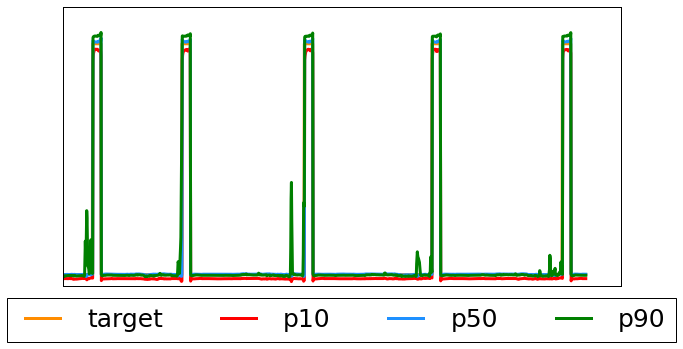

In [26]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5), facecolor='white')
plt.plot(output_map['targets']['t+0'][:1500], label='target', color='darkorange', linewidth=3)
plt.plot(output_map['p10']['t+0'][:1500], label='p10', color='red', linewidth=3)
plt.plot(output_map['p50']['t+0'][:1500], label='p50', color='dodgerblue', linewidth=3)
plt.plot(output_map['p90']['t+0'][:1500], label='p90', c='g', linewidth=3)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.yticks(np.arange(0, 3, 1))
# plt.xticks(np.arange(0, 1500))
plt.legend(loc=(-0.1, -0.2), ncol=4, fontsize=25)
plt.show()